<a href="https://colab.research.google.com/github/danfolador/recpadroes/blob/main/Exercicio02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXERCÍCIO 02**

Aluno: Daniel Folador Rossi

Matrícula: 20201mpca0306


---
1. Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

2. Treine um modelo da classe LinearRegression do scikit-learn com toda a base;

3. Calcule o MSE (erro quadrático médio) para todos os exemplos da base usada como treino no modelo treinado;

4. Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.

5. Suba seu jupyter notebook para o GitHub e disponibilize o link da tarefa (não do repositório).



In [52]:
#======================================================
# INICIALIZAÇÃO
#======================================================
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from math import sqrt


In [53]:

#======================================================
# BANCO DE DADOS
#======================================================
bd = fetch_california_housing()
#bd = load_boston()
X, y  = bd.data, bd.target


In [55]:
#======================================================
# TREINAMENTO
#======================================================
modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print("MSE=", mean_squared_error(y, ypred))
print("intercept_=", modelo.intercept_)
print("coef_=")
print(modelo.coef_) 

    # OBS
    # modelo.coef_
    # Array of shape (n_features, ) or (n_targets, n_features)
    # Estimated coefficients for the linear regression problem. If multiple
    # targets are passed during the fit (y 2D), this is a 2D array of
    # shape (n_targets, n_features), while if only one target is passed,
    # this is a 1D array of length n_features.

    # modelo.intercept_
    # Independent term in the linear model. Float or array of shape (n_targets,)


MSE= 0.5243209861846072
intercept_= -36.94192020718441
coef_=
[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


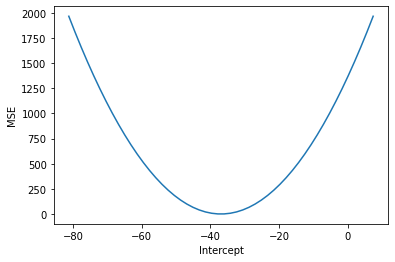

In [56]:
#======================================================
# GRAFICO DO MSE
#======================================================

delta = modelo.intercept_ * 1.2
intercept = modelo.intercept_

W0 = np.linspace(intercept - delta, intercept + delta,50)
W1 = modelo.coef_

for j in range(len(W0)):
  modelo = LinearRegression()
  modelo.fit(X, y)
  Erro = np.empty(W0.shape)
  for j in range(Erro.shape[0]):
    modelo.intercept_ = W0[j]
    modelo.coef_ = W1
    ypred = modelo.predict(X)
    Erro[j]  = mean_squared_error(y, ypred)

plt.xlabel("Intercept")
plt.ylabel("MSE")
#plt.ylim(0, 100)
#plt.xlim(-45, -25)
plt.plot(W0, Erro)
